In [10]:
# Import necessary libraries
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [11]:
# Load the Olivetti Faces dataset
faces_data = datasets.fetch_olivetti_faces(shuffle=True, random_state=42)
faces_images = faces_data.images
faces_targets = faces_data.target

In [12]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    faces_images.reshape((faces_images.shape[0], -1)),
    faces_targets,
    test_size=0.25,
    random_state=42
)

In [13]:
# Create a DataFrame for visualization
import pandas as pd
import matplotlib.pyplot as plt
y_frame = pd.DataFrame({'subject ids': y_train})

In [14]:
# Group by 'subject ids' and calculate the size of each group
class_counts = y_frame['subject ids'].value_counts()

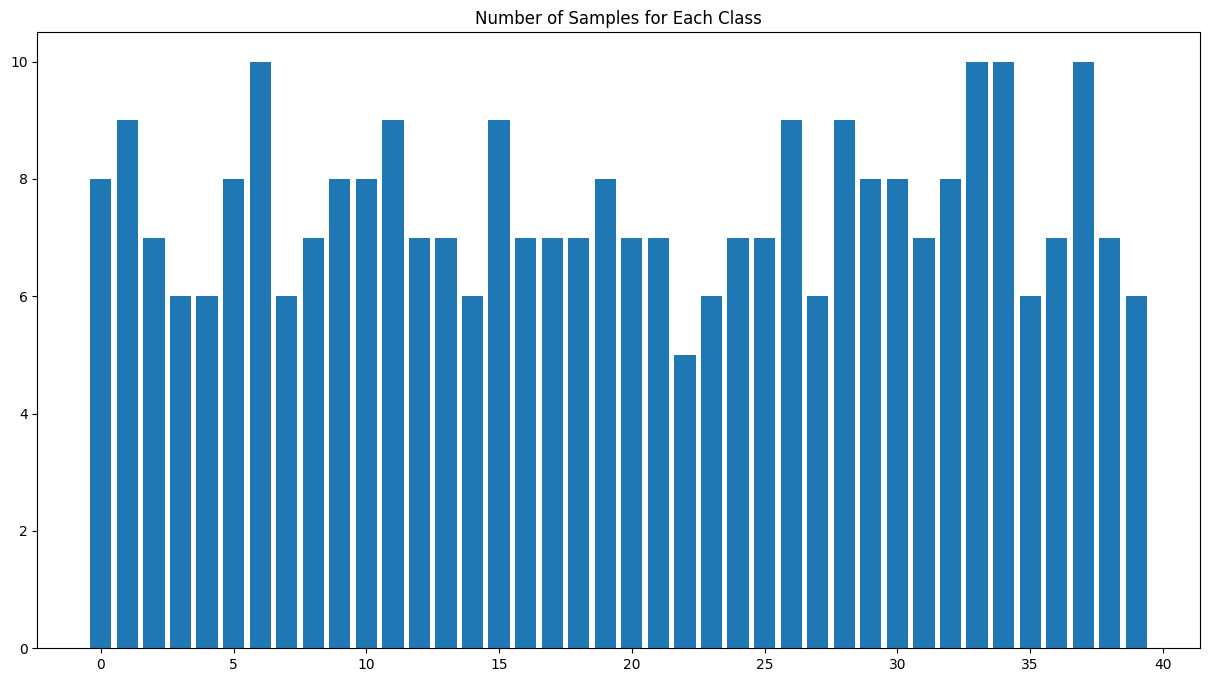

In [15]:
# Plot a bar chart
plt.figure(figsize=(15, 8))
plt.bar(class_counts.index, class_counts.values)
plt.title("Number of Samples for Each Class")
plt.show()

In [16]:
# Face detection using OpenCV
def detect_faces(image_path):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    return faces, gray

In [17]:
# Face recognition using PCA and SVM
def recognize_faces(X_train, y_train, X_test, y_test):
    pca = PCA(n_components=150, whiten=True, random_state=42)
    svc = SVC(kernel='rbf', class_weight='balanced', C=1000)

    model = make_pipeline(pca, svc)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)

    # Visualize some test predictions
    fig, axes = plt.subplots(1, 4, figsize=(15, 4))
    for i, ax in enumerate(axes):
        ax.imshow(X_test[i].reshape(64, 64), cmap='gray')
        ax.set_title(f"Predicted: {y_pred[i]}\nActual: {y_test[i]}")
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         3
           3       1.00      0.50      0.67         4
           4       1.00      0.75      0.86         4
           5       1.00      1.00      1.00         2
           6       0.00      0.00      0.00         0
           7       1.00      0.75      0.86         4
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       0.50      1.00      0.67         1
          12       0.75      1.00      0.86         3
          13       1.00      1.00      1.00         3
          14       0.80      1.00      0.89         4
          15       0.50      1.00      0.67         1
          16       1.00      1.00      1.00         3
   

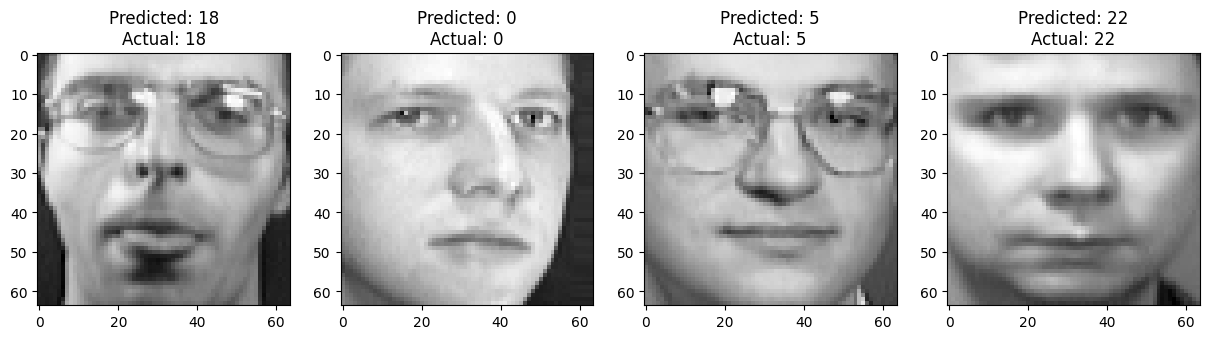

In [20]:
# Train and evaluate the face recognition model
recognize_faces(X_train, y_train, X_test, y_test)

In [21]:
# Now, to predict the label for a new image:
# Assume you have a new image to recognize
new_image_path = '/content/drive/MyDrive/face recognition data/Faces_dataset/Andy Samberg_79.jpg'
new_img = cv2.imread(new_image_path, cv2.IMREAD_GRAYSCALE)
new_face = new_img.flatten().reshape(1, -1)

In [22]:
# Train the model on the entire dataset
pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced', C=1000)

In [23]:
model = make_pipeline(pca, svc)
model.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=150, random_state=42, whiten=True)),
                ('svc', SVC(C=1000, class_weight='balanced'))])

In [25]:
# Resize the new image to match the expected input size (64x64)
new_img_resized = cv2.resize(new_img, (64, 64))
new_face_resized = new_img_resized.flatten().reshape(1, -1)

# Predict the label for the resized new image
predicted_label = model.predict(new_face_resized)
print(f"Predicted label: {predicted_label}")

Predicted label: [6]


In [26]:
# now doing the recognition for the faces dataset

In [27]:
import os

# Directory containing all the face images
dataset_path = '/content/drive/MyDrive/face recognition data/Faces_dataset/'

In [28]:
# Initialize lists to store results
predicted_labels = []
actual_labels = []

In [29]:
# Iterate through all images in the dataset
for filename in os.listdir(dataset_path):
    if filename.endswith(".jpg"):
        # Read the image
        img_path = os.path.join(dataset_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # Resize the image to match the expected input size (64x64)
        img_resized = cv2.resize(img, (64, 64))
        face = img_resized.flatten().reshape(1, -1)

        # Predict the label for the resized image
        predicted_label = model.predict(face)

        # Append actual and predicted labels to lists
        actual_label = int(filename.split('_')[-1].split('.')[0])
        actual_labels.append(actual_label)
        predicted_labels.append(predicted_label[0])

In [30]:
# Calculate and print the classification report
report = classification_report(actual_labels, predicted_labels)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.04      1.00      0.08         5
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         7
          52       0.00      0.00      0.00         1
          53       0.00      0.00      0.00         2
          54       0.00      0.00      0.00         2
          55       0.00      0.00      0.00         4
          56       0.00      0.00      0.00         4
          57       0.00      0.00      0.00         2
          58       0.00      0.00      0.00         2
          59       0.00      0.00      0.00         2
          60       0.00      0.00      0.00         1
   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
# NOw doing the face detection on some examples

In [32]:
# Face detection using OpenCV
def detect_faces(image_path):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    return faces, gray

# Face recognition using PCA and SVM
def recognize_faces(X_train, y_train, X_test, y_test):
    pca = PCA(n_components=150, whiten=True, random_state=42)
    svc = SVC(kernel='rbf', class_weight='balanced', C=1000)

    model = make_pipeline(pca, svc)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    return y_pred


In [33]:
# Example usage:
image_path = '/content/drive/MyDrive/face recognition data/Original_Images/Robert Downey Jr/Robert Downey Jr_0.jpg'
faces, gray = detect_faces(image_path)

In [34]:
for (x, y, w, h) in faces:
    face_roi = gray[y:y + h, x:x + w]
    face_roi = cv2.resize(face_roi, (64, 64))
    face_roi = face_roi.reshape(1, -1)

    predicted_label = recognize_faces(X_train, y_train, face_roi, None)
    print(f"Predicted label: {predicted_label}")

    # Draw a rectangle around the face
    cv2.rectangle(gray, (x, y), (x + w, y + h), (255, 0, 0), 2)

Predicted label: [6]


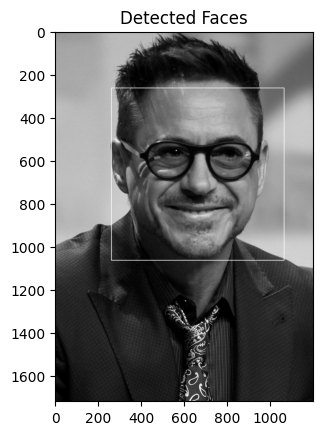

In [36]:
import matplotlib.pyplot as plt

# Display the result using matplotlib
plt.imshow(gray, cmap='gray')
plt.title('Detected Faces')
plt.show()